In [1]:
import pandas as pd

In [2]:
pd.read_csv("/content/test.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [3]:
pd.read_csv("/content/train.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
pd.read_csv("/content/sample_submission.csv")

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Handle missing values (simple strategy: fill with median for numerical, mode for categorical)
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].median(), inplace=True)

for column in test_data.columns:
    if test_data[column].dtype == 'object':
        test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        test_data[column].fillna(test_data[column].median(), inplace=True)

# Encode categorical variables using one-hot encoding
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

# Align the train and test data
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)

# Separate features and target variable
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Remove 'SalePrice' column from test data if it exists
if 'SalePrice' in test_data.columns:
    test_data = test_data.drop('SalePrice', axis=1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_val_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Validation RMSE: {rmse}')

# Make predictions on the test set
test_predictions = model.predict(test_data_scaled)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")


Validation RMSE: 29534.810286315937
Predictions saved to submission.csv


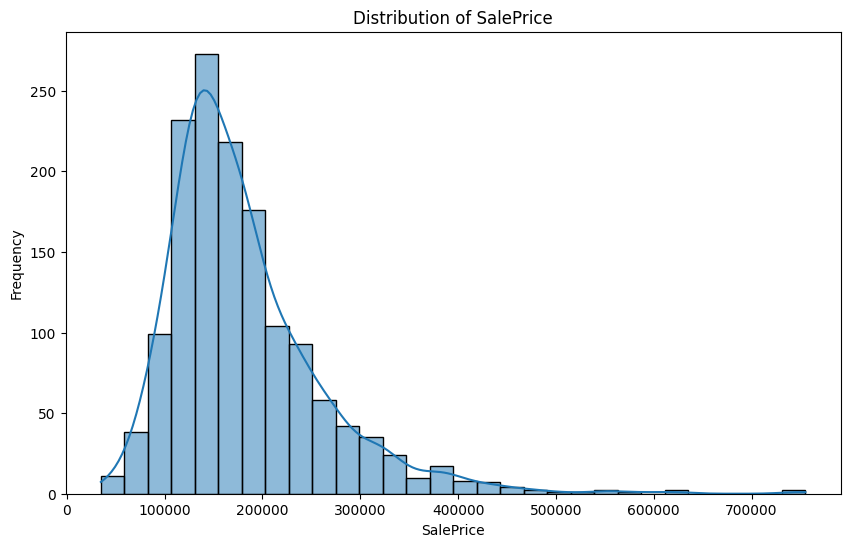

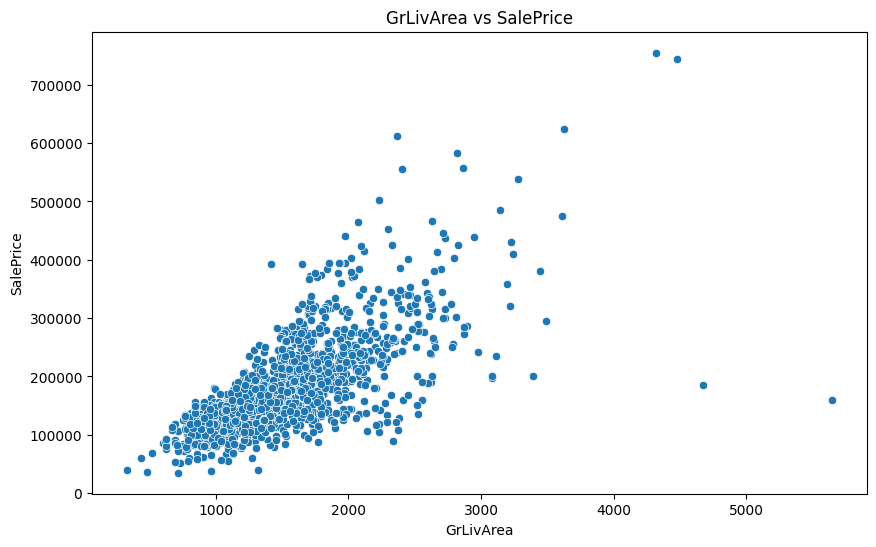

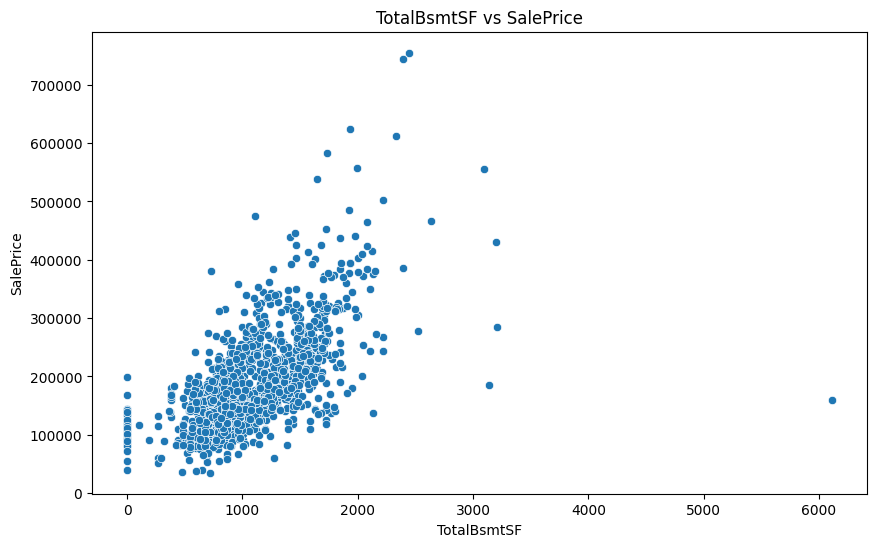

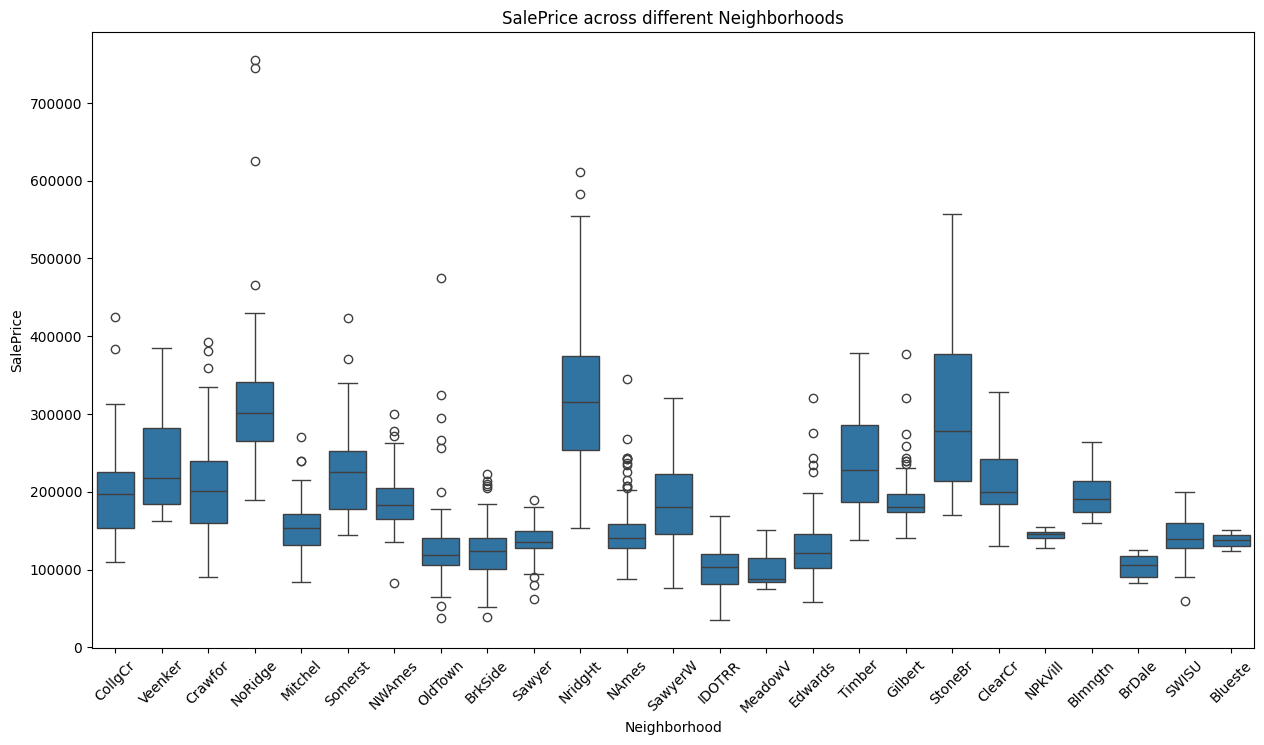

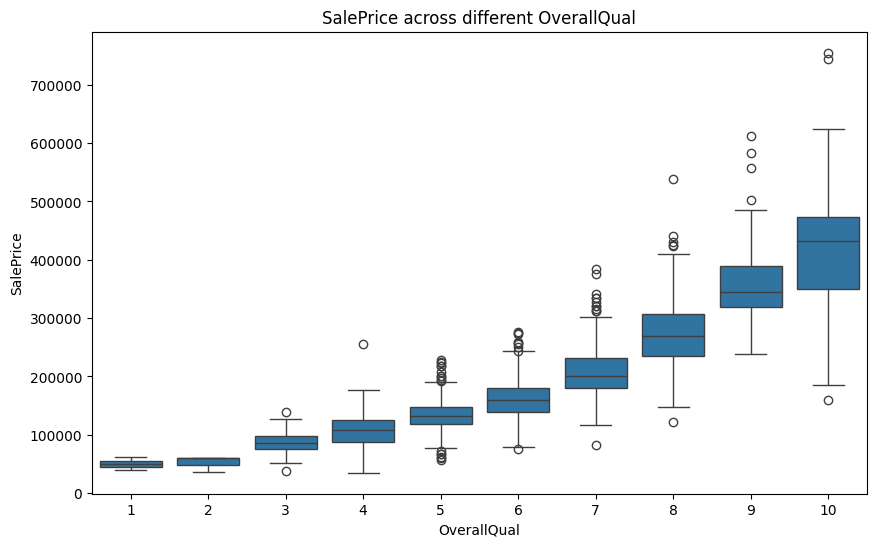

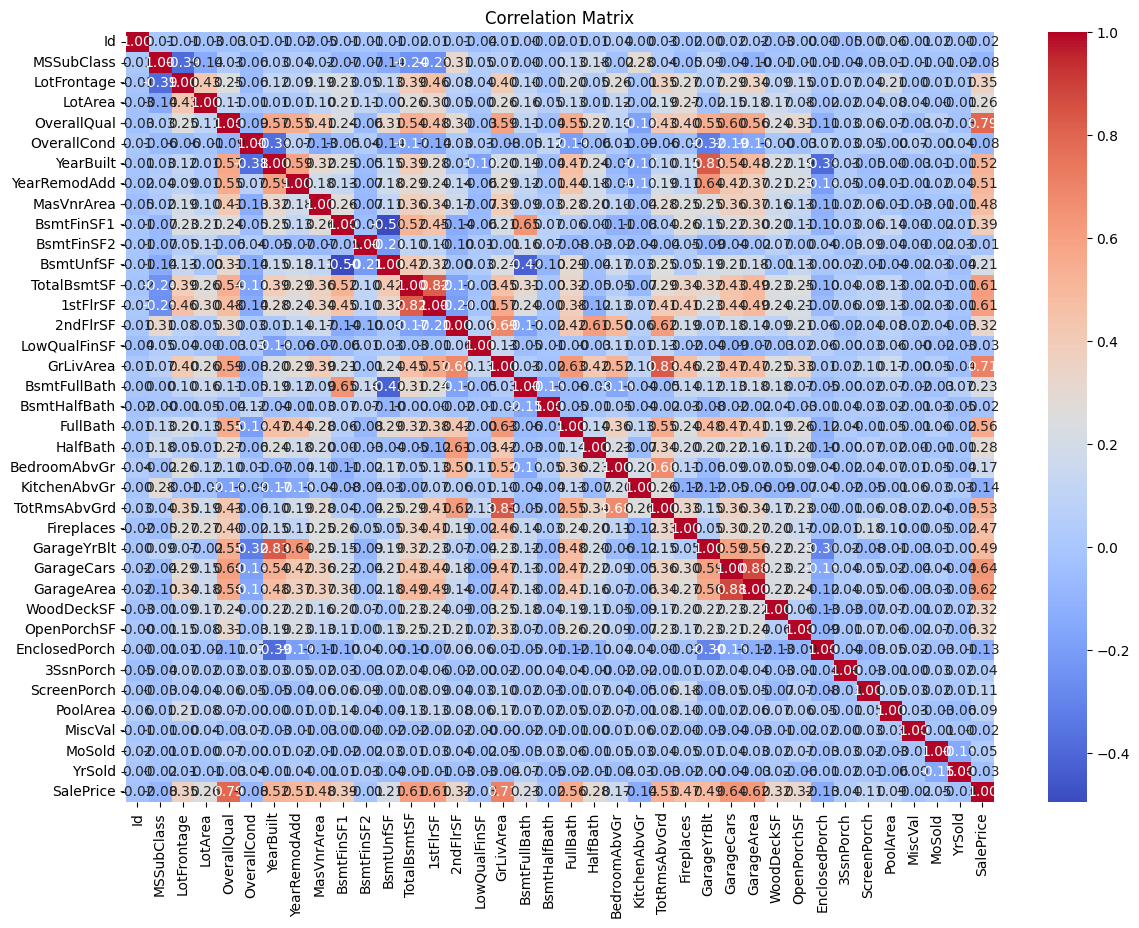

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_data = pd.read_csv('train.csv')

# 1. Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plots
# GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# TotalBsmtSF vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'])
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

# 3. Box plots
# SalePrice across different Neighborhoods
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.title('SalePrice across different Neighborhoods')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()

# SalePrice across different OverallQual
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('SalePrice across different OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# 4. Correlation Matrix
# Select only numeric columns for correlation matrix
numeric_cols = train_data.select_dtypes(include=['number']).columns
corr_matrix = train_data[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



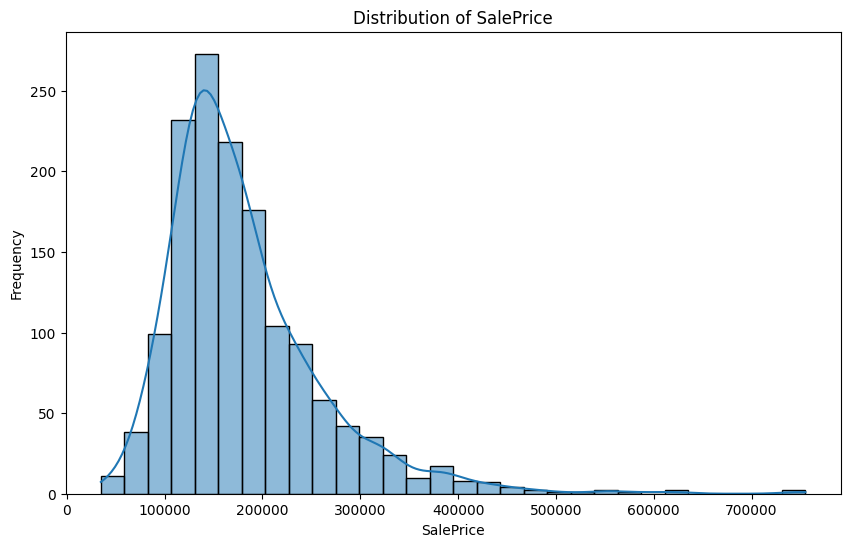

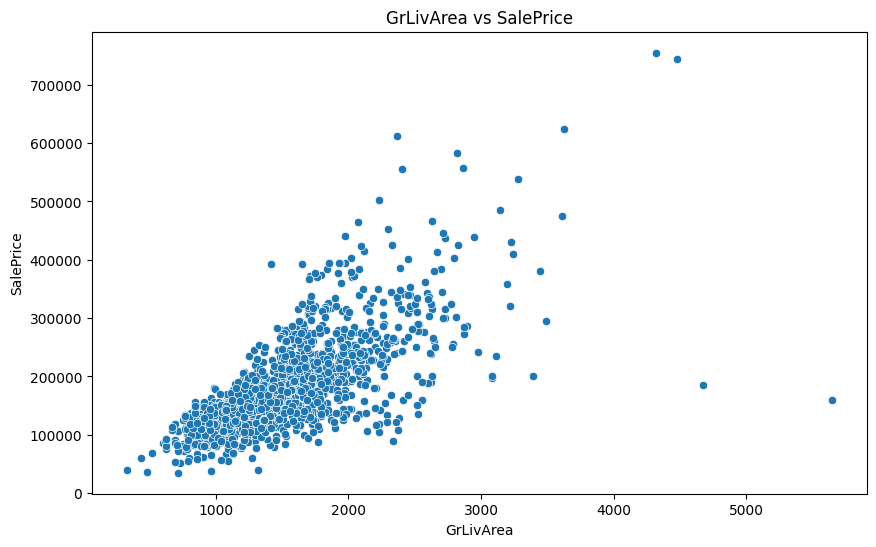

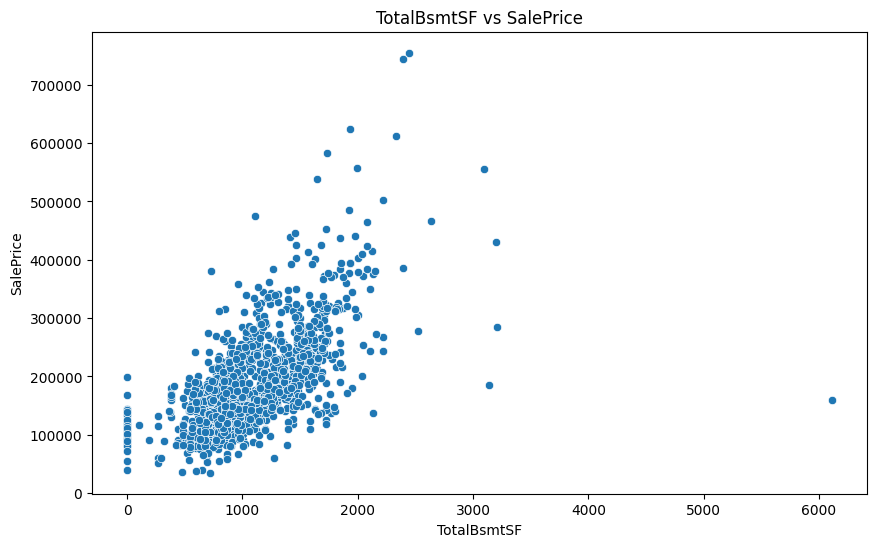

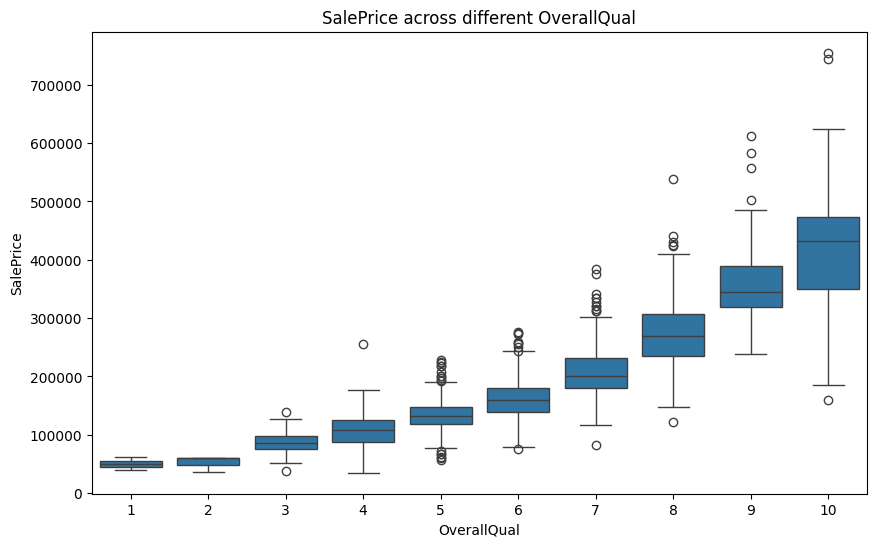

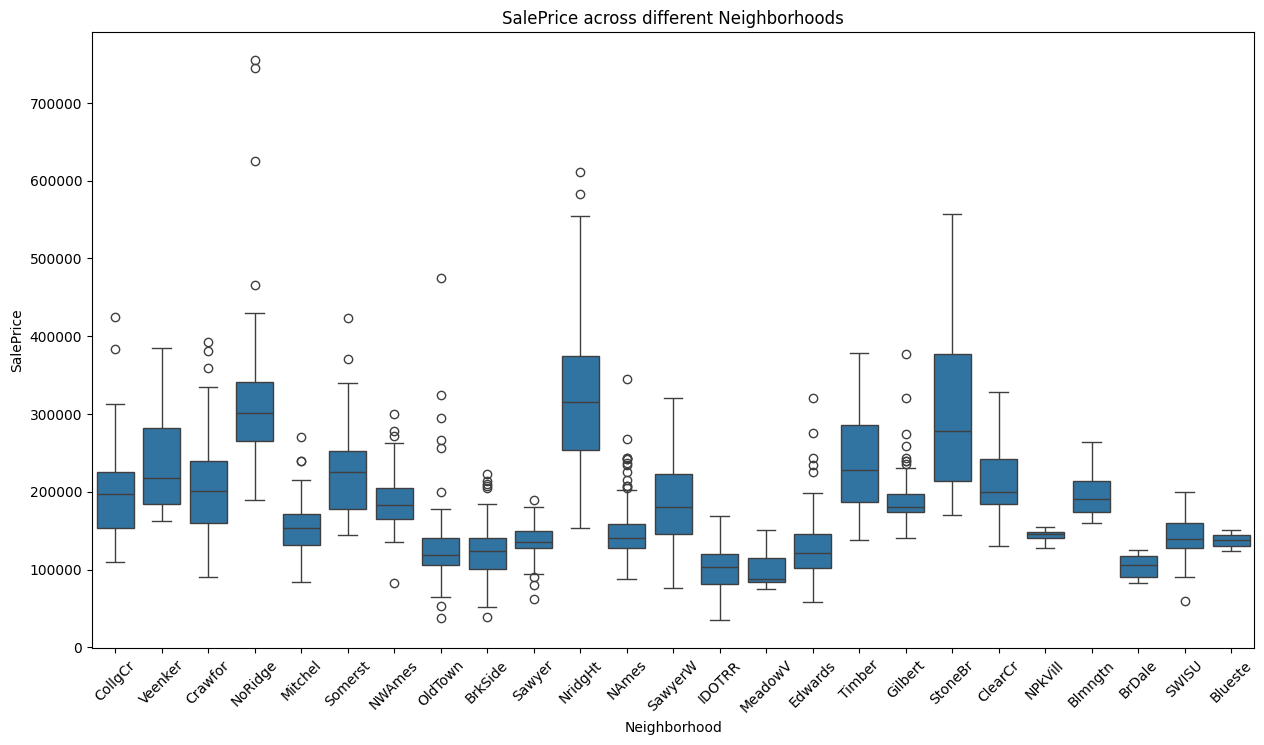

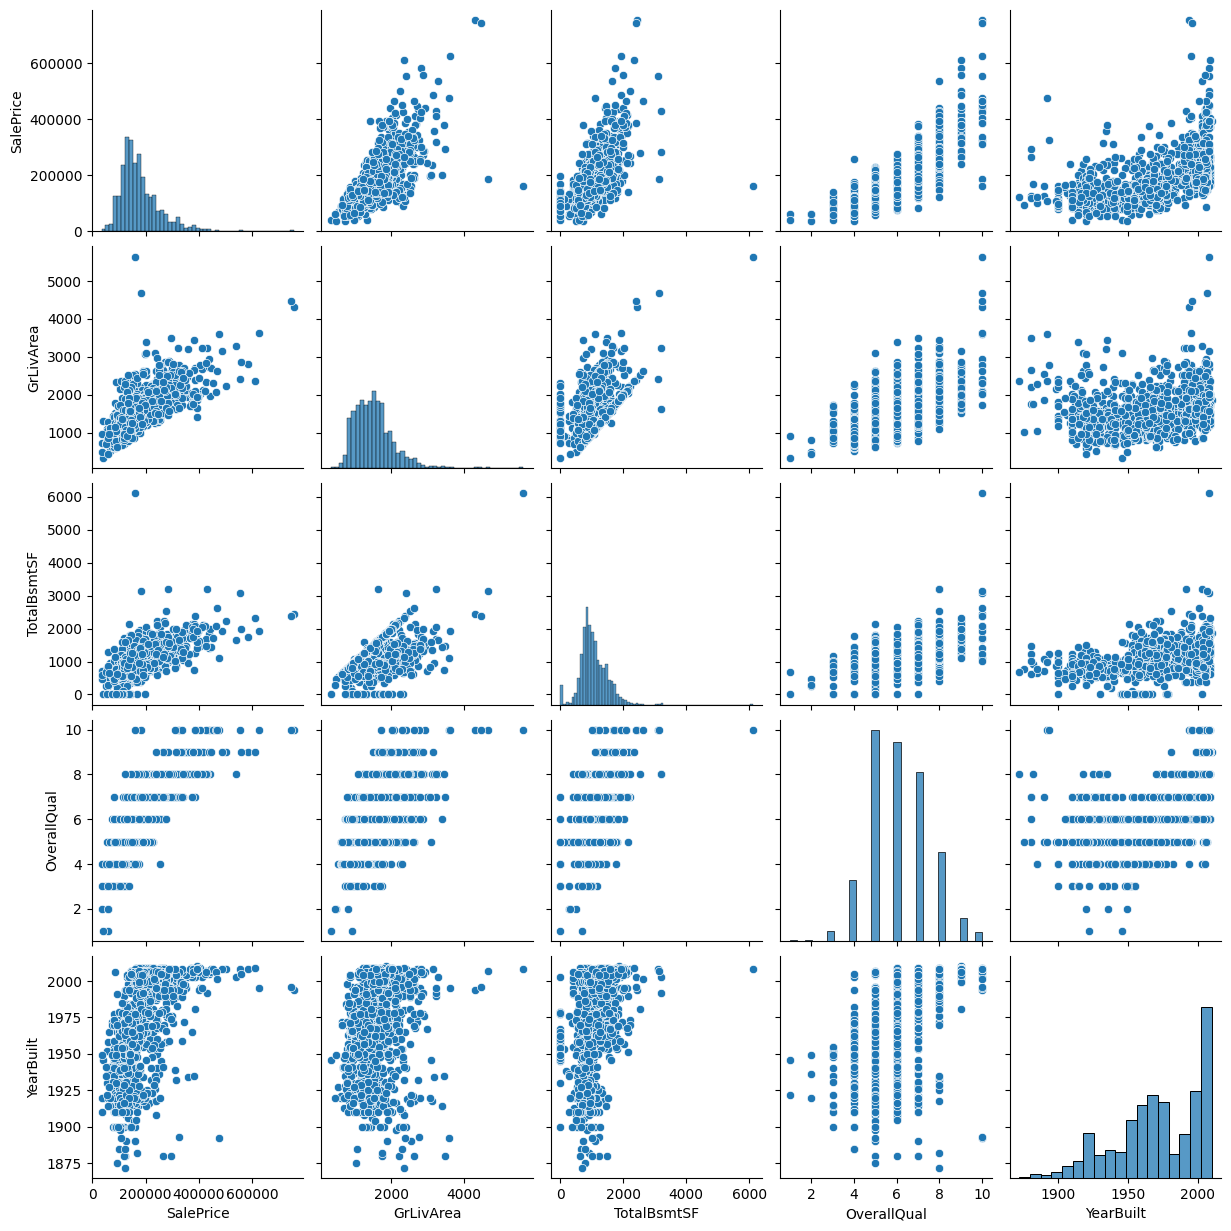

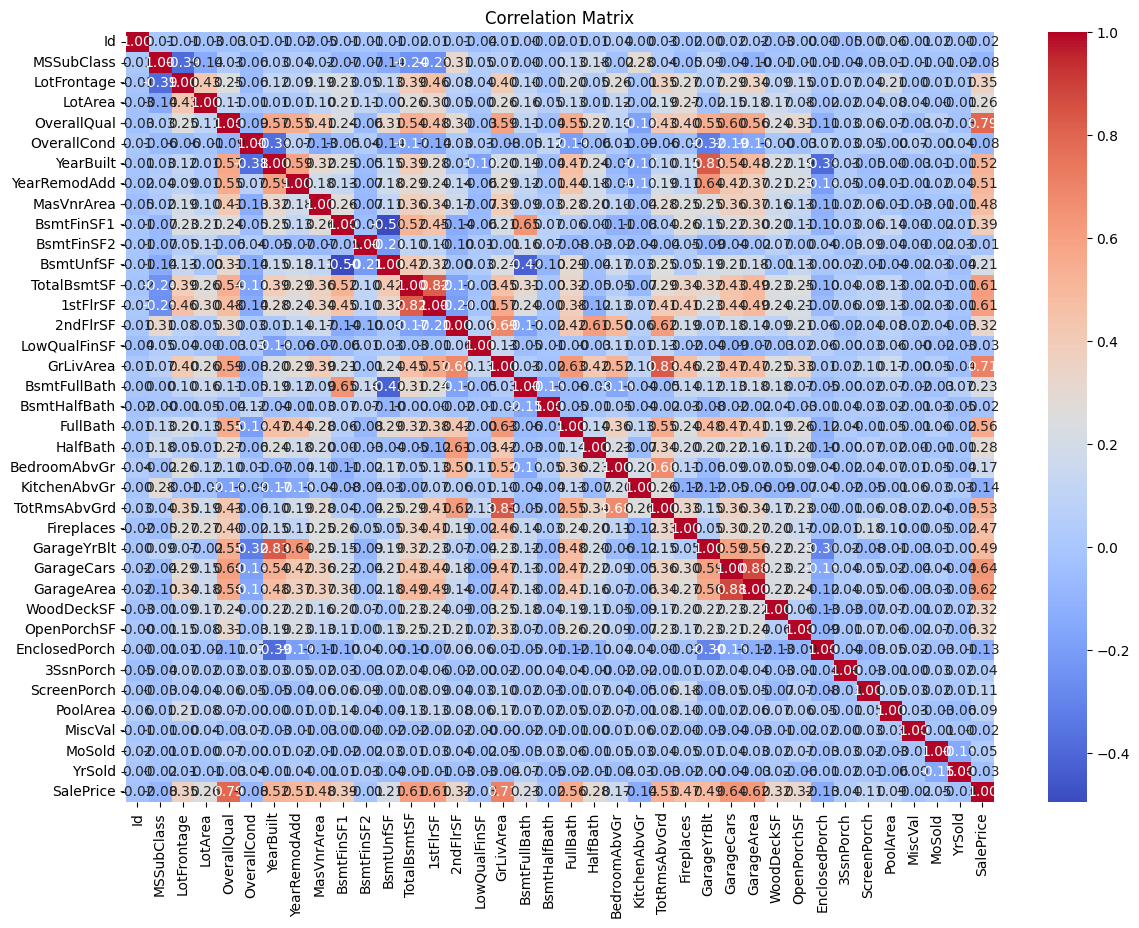

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_data = pd.read_csv('train.csv')

# 1. Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plots
# GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# TotalBsmtSF vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'])
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

# 3. Box plots
# SalePrice across different OverallQual
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('SalePrice across different OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# SalePrice across different Neighborhoods
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.title('SalePrice across different Neighborhoods')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()

# 4. Pair Plots
# Select a few numerical features for pair plots
selected_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']
sns.pairplot(train_data[selected_features])
plt.show()

# 5. Correlation Matrix
# Select only numeric columns for correlation matrix
numeric_cols = train_data.select_dtypes(include=['number']).columns
corr_matrix = train_data[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
